# Data Project

This project has the objective of analyzing trends between ETS (Emissions Trading System), the size of emissions, and the size of the emitters in the EU+UK. The data has been obtained at the European Environment Agency website.

Imports and set magics:

In [1]:
%pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


Note: you may need to restart the kernel to use updated packages.


# Read and clean data

The data has been imported manually through the code and has been cleaned previously in the selection process of the data on the previously mentioned website.

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [25]:

size_emissions = pd.read_excel('Size_emissions.xlsx', engine='openpyxl')
# Replace commas with dots and spaces with empty strings, then convert it to float
size_emissions['ETS Information'] = size_emissions['ETS Information'].apply(lambda x: float(str(x).replace(",", ".").replace(" ", "")))


historical_emissions = pd.read_excel('Historical_emissions.xlsx', engine='openpyxl')

entities_size = pd.read_excel('Entities_size.xlsx', engine='openpyxl')


In [26]:
size_emissions


,Year,Definition,Countries,Type,Measure,Size,ETS Information,Entities
0,2021,2. Verified emissions,EU27 + UK,10 Aviation,t CO2-eq,Large (emissions > 500 kt CO2-eq),16153519.0,12
1,2021,2. Verified emissions,EU27 + UK,10 Aviation,t CO2-eq,Medium (50 < emissions < 500 kt CO2-eq),9200219.0,49
2,2021,2. Verified emissions,EU27 + UK,10 Aviation,t CO2-eq,Mini (0 < emissions < 25 kt CO2-eq),887632.0,219
3,2021,2. Verified emissions,EU27 + UK,10 Aviation,t CO2-eq,Small (25 < emissions < 50 kt CO2-eq),692917.0,19
4,2021,2. Verified emissions,EU27 + UK,10 Aviation,t CO2-eq,Zero (emissions = 0 kt CO2-eq),0.0,6
5,2021,2. Verified emissions,EU27 + UK,20 Combustion of fuels,t CO2-eq,Large (emissions > 500 kt CO2-eq),628716707.0,331
6,2021,2. Verified emissions,EU27 + UK,20 Combustion of fuels,t CO2-eq,Medium (50 < emissions < 500 kt CO2-eq),126929572.0,849
7,2021,2. Verified emissions,EU27 + UK,20 Combustion of fuels,t CO2-eq,Mini (0 < emissions < 25 kt CO2-eq),22369379.0,3167
8,2021,2. Verified emissions,EU27 + UK,20 Combustion of fuels,t CO2-eq,Small (25 < emissions < 50 kt CO2-eq),23656961.0,678
9,2021,2. Verified emissions,EU27 + UK,20 Combustion of fuels,t CO2-eq,Zero (emissions = 0 kt CO2-eq),0.0,301


In [63]:
historical_emissions



,Year,Sector,Emissions
0,2013,10 Aviation,"51 019 141,000"
1,2014,10 Aviation,"52 020 623,000"
2,2015,10 Aviation,"54 313 368,000"
3,2016,10 Aviation,"59 160 541,000"
4,2017,10 Aviation,"62 143 223,000"
5,2018,10 Aviation,"65 153 008,000"
6,2019,10 Aviation,"66 006 062,000"
7,2020,10 Aviation,"24 481 061,000"
8,2021,10 Aviation,"26 934 287,000"
9,2013,20 Combustion of fuels,"1307 402 649,000"


Explain what you see when moving elements of the interactive plot around. 

In [64]:
entities_size


,Size,10 Aviation,20 Combustion of fuels,20-99 All stationary installations
0,Large (emissions > 500 kt CO2-eq),0.0393,0.0621,0.0661
1,Medium (50 < emissions < 500 kt CO2-eq),0.1607,0.1594,0.2069
2,Small (25 < emissions < 50 kt CO2-eq),0.0623,0.1273,0.1455
3,Mini (0 < emissions < 25 kt CO2-eq),0.7180,0.5946,0.5328
4,Zero (emissions = 0 kt CO2-eq),0.0197,0.0565,0.0488


# Merge data sets

This plot shows the total emissions for each sector (Aviation, Combustion of fuels, and All stationary installations) over time. It enables us to observe the trend in emissions generated by each sector, allowing us to identify if there are any significant changes in emissions over the years. This information can be useful in evaluating the effectiveness of emission reduction policies and strategies implemented within these sectors.

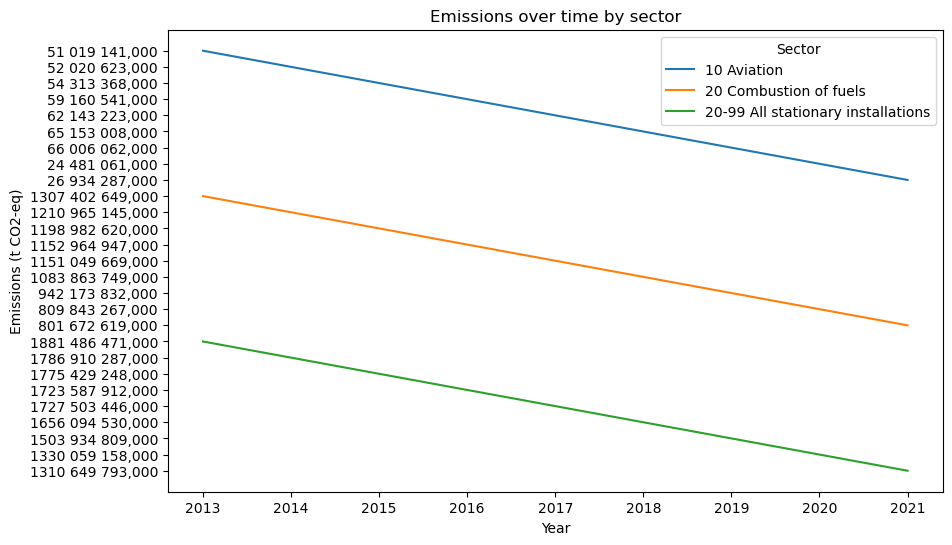

In [8]:
# Emissions over time by sector

plt.figure(figsize=(10, 6))
sns.lineplot(data=historical_emissions, x="Year", y="Emissions", hue="Sector")
plt.title("Emissions over time by sector")
plt.ylabel("Emissions (t CO2-eq)")
plt.show()

Is possible to see that there is a decreasing trend, it could suggest that the policies and strategies implemented to reduce emissions are being effective.

The next plot displays the proportion of entities within each size category (Large, Medium, Small, Mini, and Zero) for each sector. It helps visualize the distribution of entities across various size categories and sectors, which can inform policymakers about the sectors with a higher concentration of larger or smaller entities, potentially targeting emission reduction measures more effectively.

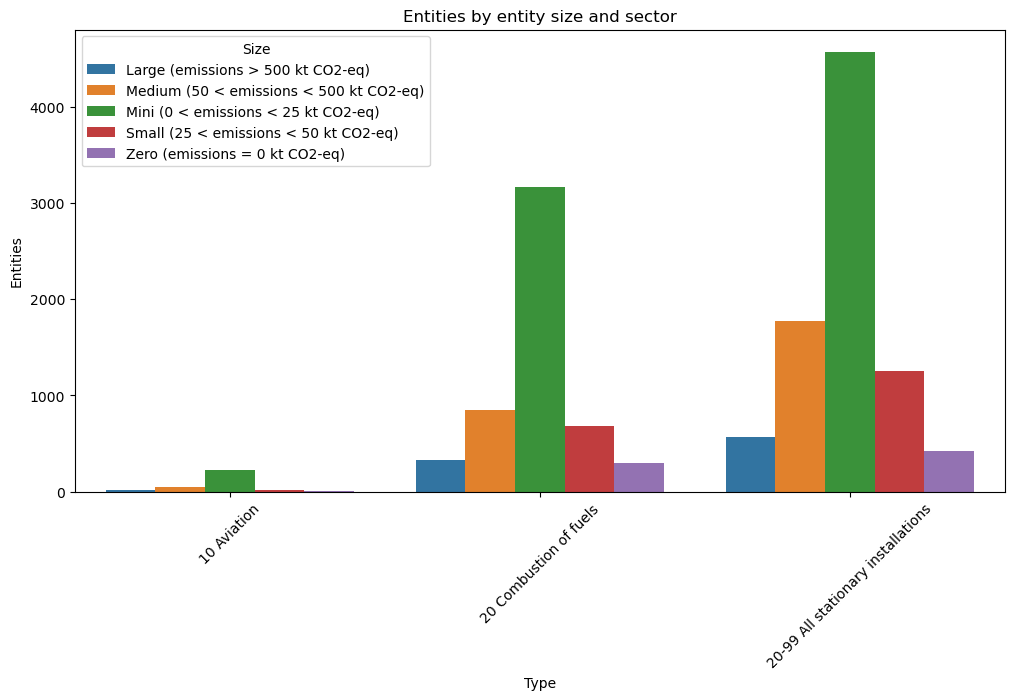

In [28]:
# Emissions by entity size and sector

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=size_emissions, x="Type", y="Entities", hue="Size")
plt.title("Entities by entity size and sector")
plt.ylabel("Entities")
plt.xticks(rotation=45)
plt.show()

All sectors have a higher presence of Mini entities' emissions, with "Large" being a minority. However, as it will be possible to visualize on the next graph, the Large entities have a huge impact on the total emissions on each sector.

C:\Users\mauri\AppData\Local\Temp\ipykernel_26892\62830509.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = size_emissions.groupby(['Size', 'Type'])['Entities', 'ETS Information'].sum().reset_index()


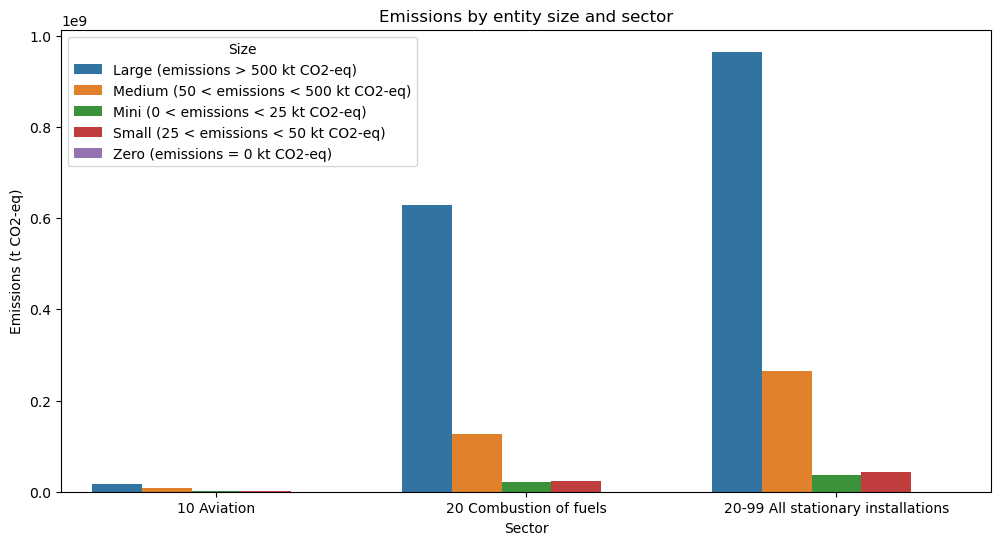

In [29]:
# Emissions by entity size and sector
# Group data by size and sector and sum the emissions
grouped_data = size_emissions.groupby(['Size', 'Type'])['Entities', 'ETS Information'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Type", y="ETS Information", hue="Size")
plt.title("Emissions by entity size and sector")
plt.ylabel("Emissions (t CO2-eq)")
plt.xlabel("Sector")
plt.show()

The two previous plots shows the number of entities and their total emissions within each size category for all sectors combined. It highlights that, while large entities make up a small percentage of the total number of entities, they are responsible for a significant portion of total emissions. This finding emphasizes the need for targeted policies to address emissions from large companies, as they have a substantial impact on the overall emissions.
The visualization of the Aviation sector is not the best in this scenario, so a presentation of the average emissions can minimize this problem.

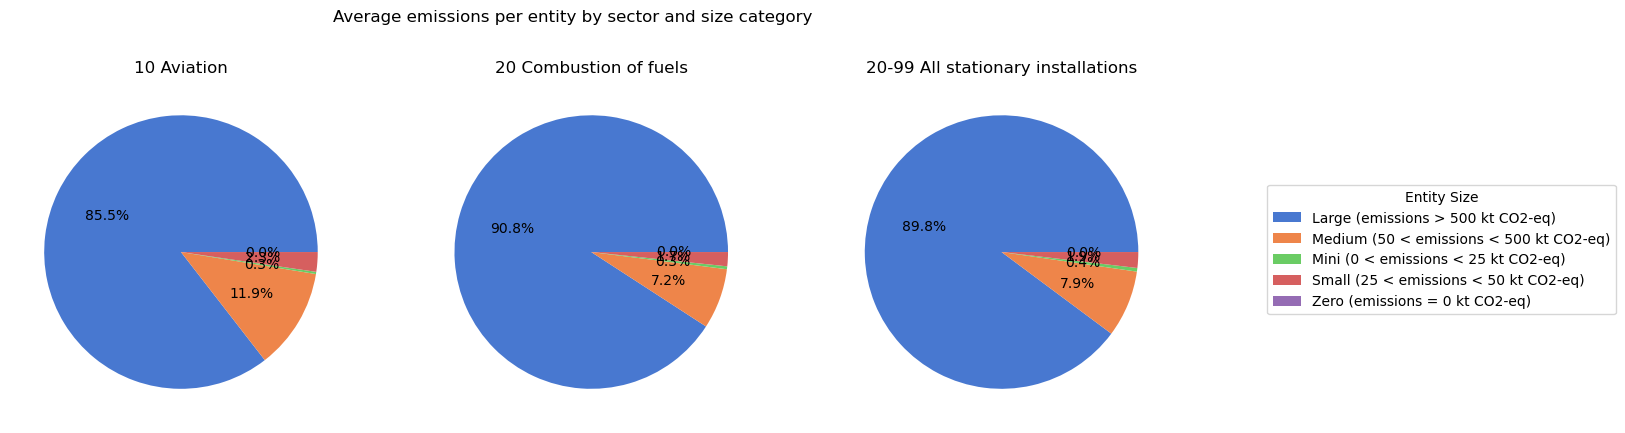

In [57]:

# Average emissions per entity by sector and size
# Calculate the average emissions per entity for each sector and size category
average_emissions_by_sector_and_size = size_emissions.groupby(['Type', 'Size']).apply(
    lambda x: x['ETS Information'].sum() / x['Entities'].sum()
).reset_index(name='Average Emissions per Entity')


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sectors = average_emissions_by_sector_and_size['Type'].unique()
size_categories = average_emissions_by_sector_and_size['Size'].unique()
colors = sns.color_palette("muted", len(size_categories))

for index, sector in enumerate(sectors):
    sector_data = average_emissions_by_sector_and_size[average_emissions_by_sector_and_size['Type'] == sector]
    wedges, texts, autotexts = axes[index].pie(sector_data['Average Emissions per Entity'], autopct='%1.1f%%', colors=colors)
    axes[index].set_title(sector)

# Create a single legend for all pie charts
fig.legend(wedges, size_categories, title="Entity Size", loc="center right", bbox_to_anchor=(0.7, 0, 0.5, 1))

fig.suptitle("Average emissions per entity by sector and size category")

plt.show()




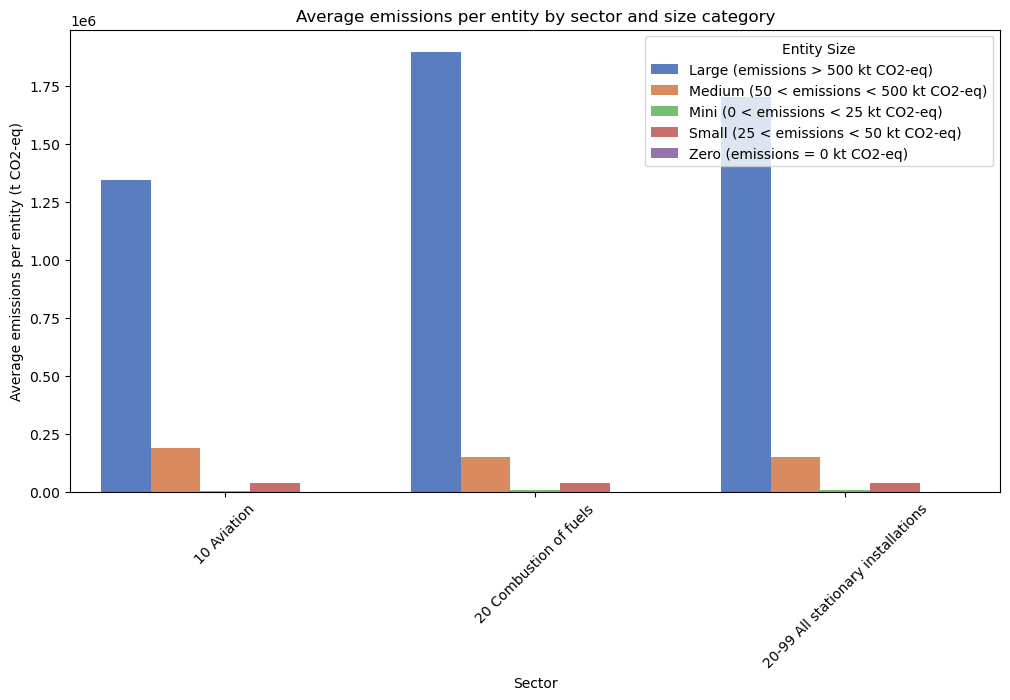

In [39]:
# Average emissions per entity by sector and size
# Calculate the average emissions per entity for each sector and size category
average_emissions_by_sector_and_size = size_emissions.groupby(['Type', 'Size']).apply(
    lambda x: x['ETS Information'].sum() / x['Entities'].sum()
).reset_index(name='Average Emissions per Entity')

plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Average Emissions per Entity', hue='Size', data=average_emissions_by_sector_and_size, palette="muted")
plt.title("Average emissions per entity by sector and size category")
plt.xlabel("Sector")
plt.ylabel("Average emissions per entity (t CO2-eq)")
plt.xticks(rotation=45)
plt.legend(title="Entity Size")
plt.show()


Understanding the average emissions per entity by sector and size is important because it helps identify the most emissions-intensive entities within each sector. This information can be used to prioritize climate policy efforts and target emissions reduction measures more effectively. By focusing on the most emissions-intensive entities, policymakers can achieve more significant emissions reductions while optimizing the use of resources.
The plot shows that, on average, the large entities have the highest emissions per entity in all sectors. The average emissions per entity decrease as the size category becomes smaller. This trend is expected, as larger entities generally have more substantial operations and emit more greenhouse gases. It's also evident that the combustion of fuels sector tends to have higher average emissions per entity across all size categories compared to the aviation sector and all stationary installations. Again, this insight can be valuable for designing targeted policies and interventions to reduce emissions.

# Conclusion

ADD CONCISE CONLUSION.